## Linear Regression

### Exploratory Data Analysis (EDA).

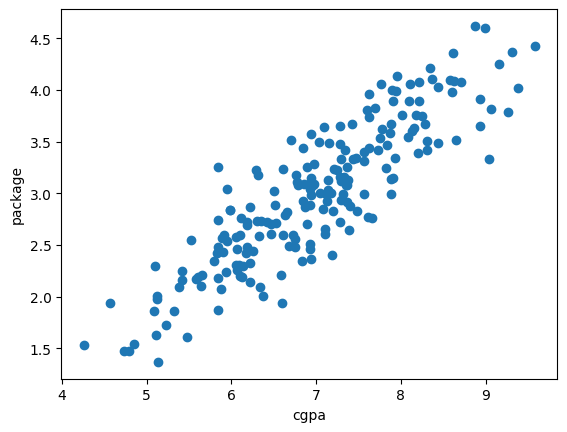

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('placement.csv')
plt.scatter(df["cgpa"],df["package"])
plt.xlabel("cgpa")
plt.ylabel("package")
plt.show()

In [17]:
x = df["cgpa"]
y = df["package"]
x = x.to_numpy().reshape(-1,1)
y = y.to_numpy().reshape(-1,1)
x.shape , y.shape

((200, 1), (200, 1))

### Train Test Split 

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((160, 1), (40, 1), (160, 1), (40, 1))

##### Creating and training a Linear Regression model using the training data.

In [19]:
from sklearn.linear_model import LinearRegression
lr  = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred = lr.predict(X_test)

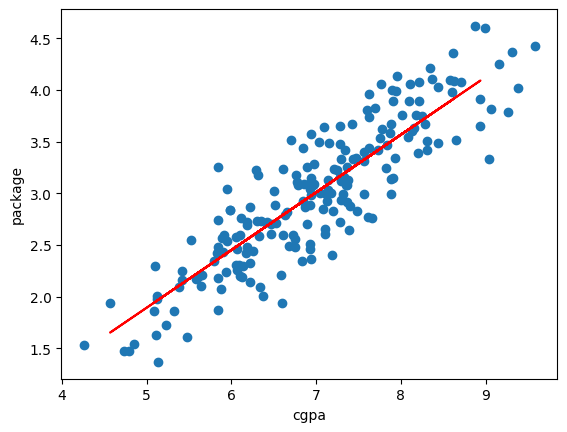

In [21]:
plt.scatter(x,y)
plt.xlabel("cgpa")
plt.ylabel("package")
plt.plot(X_test,y_pred,color="red")
plt.show()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test,y_pred)
mse  = mean_absolute_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
mae,mse,r2

(0.2884710931878175, 0.2884710931878175, 0.780730147510384)

 #### TASK

In [23]:
df = pd.read_csv('Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded = df

cols_to_encode = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                  'airconditioning', 'prefarea', 'furnishingstatus']

for col in cols_to_encode:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])


In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded.iloc[:, 1:], df_encoded.iloc[:, 0], test_size=0.30, random_state=2)

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1)) 
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1)) 

In [27]:
Ir = LinearRegression() 
lr.fit(X_train, y_train_scaled)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)
area = X_test.iloc[:,0]

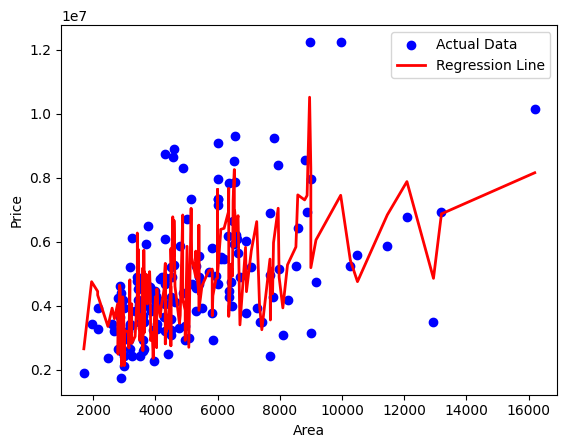

In [29]:

y_pred_original =  scaler.inverse_transform(y_pred.reshape(-1, 1)) 
# Sort values for a smooth Line 
import numpy as np 
sorted_indices = np.argsort(X_test.iloc[:, 0]) 
X_sorted = X_test.iloc[:, 0].values [sorted_indices] 
y_pred_sorted = y_pred_original [sorted_indices] 
# Plot actual vs predicted values 
import matplotlib.pyplot as plt 
plt.scatter(X_test.iloc[:, 0], y_test, label="Actual Data", color="blue") 
plt.plot(X_sorted, y_pred_sorted, color="red", linewidth=2, label="Regression Line") 
plt.xlabel("Area") 
plt.ylabel("Price") 
plt.legend() 
plt.show()

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test_scaled,y_pred)
mse  = mean_absolute_error(y_test_scaled,y_pred)
r2 = r2_score(y_test_scaled,y_pred)
mae,mse,r2

(0.4526963876021098, 0.4526963876021098, 0.6509413309763019)